<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/Paul-Himyak-folder/Paul%20Himyak/work_with_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget -c "https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D1%81%D0%B5%D0%BC%D0%BF%D0%BB%20%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%B0.xlsx"
!wget -qc "https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%20%D0%BF%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3%20%D1%87%D0%B0%D1%81%D1%82%D1%8C.xlsx"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import uuid
import re
import numpy as np
import seaborn as sns


In [3]:
#df = pd.read_excel("семпл датасета.xlsx")
df = pd.read_excel("датасет профпатолог часть.xlsx")


In [4]:
#Удаляем случайные вбросы
df.drop([843, 851, 1022, 1024], inplace = True)

In [5]:
#Убираем пустые колонки
empty_columns = df.columns[df.isna().all()]
df.drop(empty_columns, inplace = True, axis = 1)


In [6]:
FIELD_CLIENT_AGE = "КлиентВозраст"
FIELD_CLIENT_BIRTH_DAY = "КлиентДатаРождения"
FIELD_CLIENT_GENDER = "КлиентПол"
FIELD_CLIENT_GENDER_M = 0
FIELD_CLIENT_GENDER_F = 1
FIELD_CONCLUSION = "ЗаключениеМК"
FIELD_CONCLUSION_FIT = 0
FIELD_CONCLUSION_PART_FIT = 1
FIELD_CONCLUSION_NOT_FIT = 2

FIELD_DISPANSARY_GROUP = "ДиспансернаяГруппа"
FIELD_DISPANSARY_GROUP_I = 0
FIELD_DISPANSARY_GROUP_II = 1
FIELD_DISPANSARY_GROUP_III = 2
FIELD_DISPANSARY_GROUP_OTHER = 3

FIELD_HARMFUL_FACTORS = "ВредныеФакторы"



In [7]:
from datetime import datetime
# Определяем функцию для расчета возраста на основе даты
def calculate_age_from_date(date):
    current_year = pd.Timestamp.now().year
    age = current_year - date.year
    return age

In [8]:
df[FIELD_CLIENT_GENDER].value_counts()

Мужской    1447
Женский     531
Name: КлиентПол, dtype: int64

In [9]:
# Определяем функцию для замены значений
def replace_gender(x):
    if x == 'Мужской':
        return FIELD_CLIENT_GENDER_M
    elif x == 'Женский':
        return FIELD_CLIENT_GENDER_F
    else:
        return None

In [10]:
df[FIELD_CONCLUSION].value_counts()

Годен                               1434
ГоденСКоррекциейЗрения               123
ВременноНегоден                        9
НуждаетсяВДообследованииИЛечении       2
ОграниченноГоден                       2
ГоденБезРаботНаВысотах                 1
Name: ЗаключениеМК, dtype: int64

In [11]:
def resolve_conclusion(arg):
  try:
    if "Годен" == arg:
      return FIELD_CONCLUSION_FIT
    elif "Негоден" in arg:
      return FIELD_CONCLUSION_NOT_FIT
    elif "Годен" in arg:
      return FIELD_CONCLUSION_PART_FIT
    else:
      return FIELD_CONCLUSION_NOT_FIT
  except (TypeError):
      return None

In [12]:
print(resolve_conclusion("ВременноНегоден"))

2


In [13]:
df[FIELD_DISPANSARY_GROUP].value_counts()

I       779
II      389
IIIа    369
IIIб     25
Name: ДиспансернаяГруппа, dtype: int64

In [14]:
def resolve_dispansary_group(arg):
  try:
    if arg == "I":
      return FIELD_DISPANSARY_GROUP_I
    elif arg == "II":
      return FIELD_DISPANSARY_GROUP_II
    elif "III" in arg :
      return FIELD_DISPANSARY_GROUP_III
    else:
      return FIELD_DISPANSARY_GROUP_OTHER
  except (TypeError):
      return None


In [15]:
df1 = df[FIELD_HARMFUL_FACTORS].str.split(",")

In [16]:
#Значения вредных факторов. Нужно как-то токенизировать
df1.explode().sort_values().unique()

array(['1.1', '1.14.1', '1.14.2', '1.15', '1.17', '1.18.3', '1.19.1',
       '1.2', '1.23', '1.24', '1.29', '1.29.1', '1.29.2', '1.29.4', '1.3',
       '1.30.1', '1.34.1', '1.36', '1.36.1', '1.37', '1.37.1', '1.37.1.1',
       '1.37.1.2', '1.39', '1.45.1', '1.46', '1.48', '1.49', '1.49.14',
       '1.49.2', '1.50', '1.8.1', '1.8.1.1', '1.8.1.2', '1.8.2',
       '1.8.2.1', '1.8.2.2', '1.8.3', '1.8.3.1', '1.8.3.2', '10', '11',
       '11.1', '11.2', '11.3', '11.4', '12', '13', '14', '15', '17', '18',
       '18.1', '18.2', '2.4', '2.4.3', '22', '23', '24', '25', '26', '27',
       '3.1', '3.1.2', '3.1.7', '3.1.8.1', '3.1.8.2', '3.1.8.3', '3.4',
       '4.1', '4.10', '4.2', '4.2.1', '4.2.3', '4.2.4', '4.2.5', '4.3.1',
       '4.3.2', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5.1', '5.2',
       '5.2.1', '6', '6.1', '6.2', '8', '9'], dtype=object)

In [17]:
fields = [
    "КлиентДатаРождения ", "КлиентПол", "ТипМедосмотра", 
    "ПсихОсвидетельствование", "Профессия", "ЗаключениеМК",
    "ДиспансернаяГруппа", "ВредныеФакторы"
]

In [18]:
df_new = pd.DataFrame()

In [19]:
#Поле возраста
df_new[FIELD_CLIENT_AGE] = df[FIELD_CLIENT_BIRTH_DAY].apply(calculate_age_from_date)

In [20]:
#Поле секс
df_new[FIELD_CLIENT_GENDER] = df[FIELD_CLIENT_GENDER].apply(lambda x: replace_gender(x) if pd.notnull(x) else x)

In [21]:
#Диспансерная группа 
df_new[FIELD_DISPANSARY_GROUP] = df[FIELD_DISPANSARY_GROUP].apply(resolve_dispansary_group).head()

In [22]:
#Вредные факторы преобразовать в массив
df_new[FIELD_HARMFUL_FACTORS] = df[FIELD_HARMFUL_FACTORS].str.split(",")

In [23]:
df[FIELD_CONCLUSION].info()

<class 'pandas.core.series.Series'>
Int64Index: 1978 entries, 0 to 1981
Series name: ЗаключениеМК
Non-Null Count  Dtype 
--------------  ----- 
1571 non-null   object
dtypes: object(1)
memory usage: 30.9+ KB


In [24]:
df_new[FIELD_CONCLUSION] = df[FIELD_CONCLUSION].apply(lambda x: resolve_conclusion(x))

In [25]:
df_new[FIELD_CONCLUSION + "OLD"] = df[FIELD_CONCLUSION]

In [26]:
df_new

,КлиентВозраст,КлиентПол,ДиспансернаяГруппа,ВредныеФакторы,ЗаключениеМК,ЗаключениеМКOLD
0,47,1,0.0,[11.4],0.0,Годен
1,36,0,2.0,[4.2.5],0.0,Годен
2,38,0,1.0,[4.2.5],1.0,ГоденСКоррекциейЗрения
3,35,0,0.0,[11.1],0.0,Годен
4,39,0,1.0,[11.1],1.0,ГоденСКоррекциейЗрения
...,...,...,...,...,...,...
1977,51,0,NaN,[6.1],NaN,NaN
1978,37,0,NaN,[6.1],NaN,NaN
1979,29,0,NaN,"[5.1, 23]",NaN,NaN
1980,51,1,NaN,[23],NaN,NaN


<Axes: title={'center': 'Проверка сбалансированности данных'}, xlabel='ЗаключениеМК', ylabel='count'>

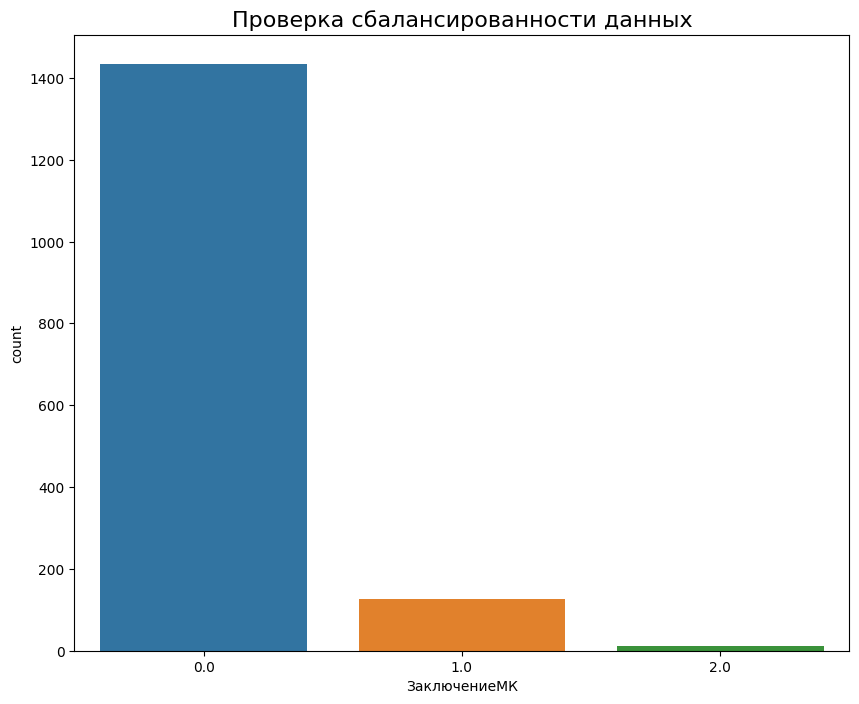

In [27]:
# Задаем размер полотна
plt.figure(figsize=(10,8))

# Добавляем название графика
plt.title('Проверка сбалансированности данных', fontsize=16)

# Строим график countplot
sns.countplot(x=FIELD_CONCLUSION, data=df_new)

<Axes: xlabel='КлиентВозраст', ylabel='count'>

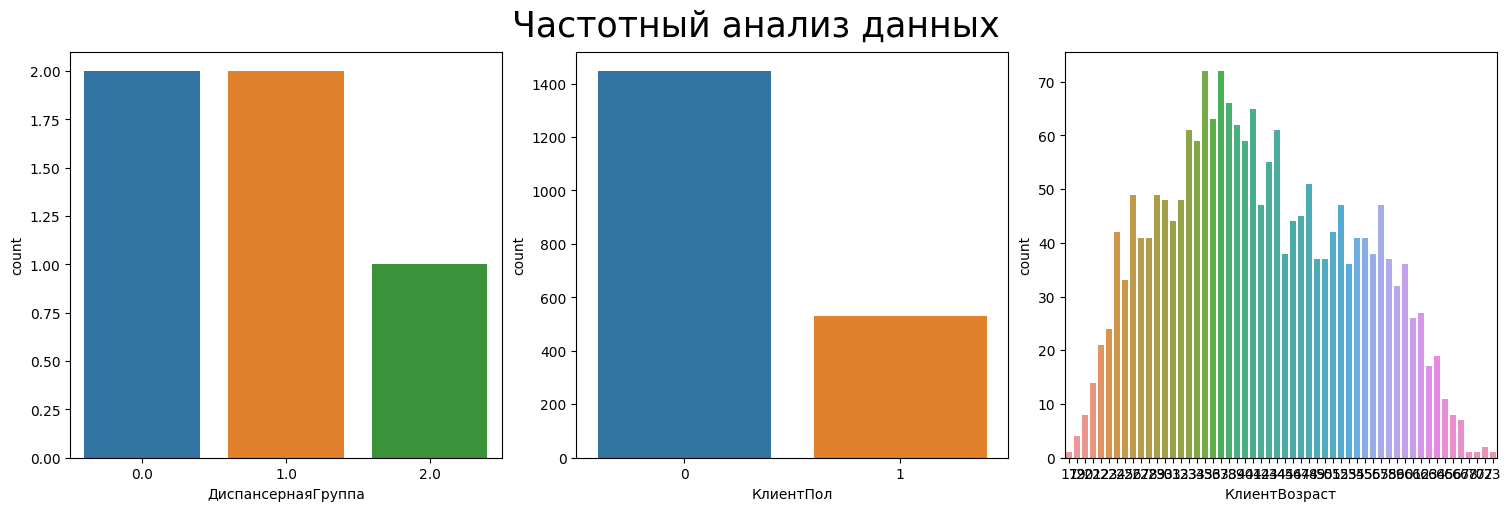

In [33]:
# Задаем параметры полотна
fig, ax = plt.subplots(1,3, sharex=False, sharey=False,figsize=(15,5), constrained_layout=True)

# Добавляем название графика
fig.suptitle('Частотный анализ данных', fontsize=25)

# Отрисовываем графики по каждому параметру
sns.countplot(x= FIELD_DISPANSARY_GROUP, data=df_new, ax=ax[0])
sns.countplot(x= FIELD_CLIENT_GENDER, data=df_new, ax=ax[1])
sns.countplot(x= FIELD_CLIENT_AGE, data=df_new, ax = ax[2])

<Axes: xlabel='ДиспансернаяГруппа', ylabel='count'>

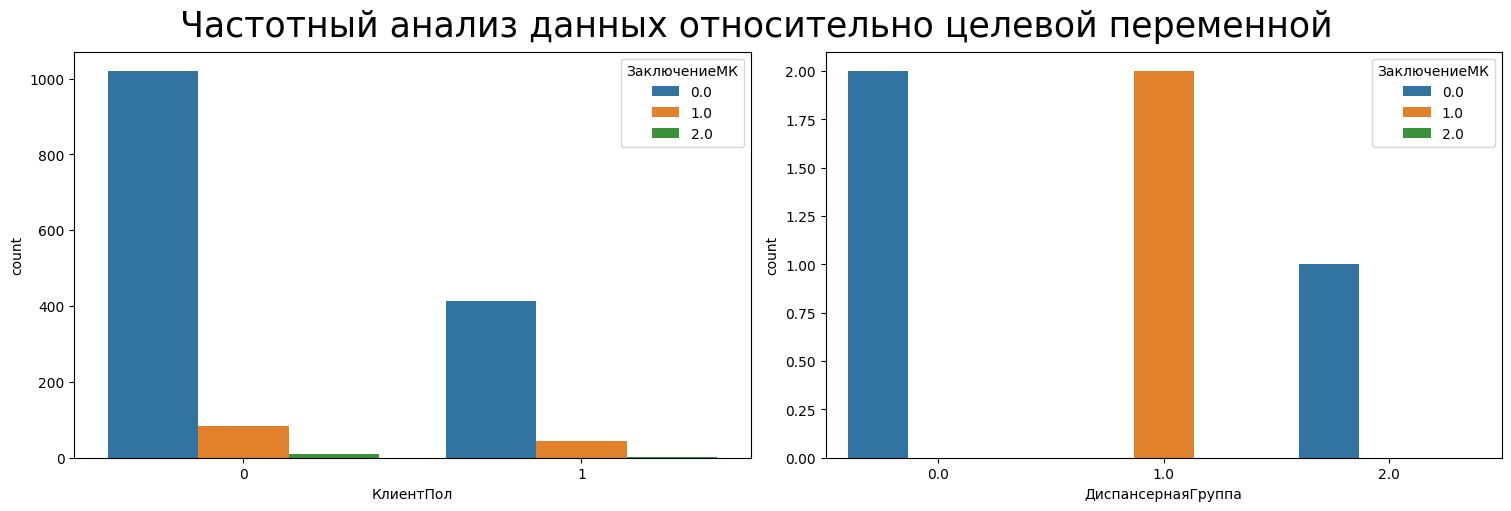

In [35]:
# Задаем параметры полотна
fig, ax = plt.subplots(1,2, sharex=False, sharey=False,figsize=(15,5), constrained_layout=True)

# Добавляем название графика
fig.suptitle('Частотный анализ данных относительно целевой переменной', fontsize=25)

# Отрисовываем графики по каждому параметру
sns.countplot(x= FIELD_CLIENT_GENDER, hue= FIELD_CONCLUSION,data=df_new, ax=ax[0])
sns.countplot(x= FIELD_DISPANSARY_GROUP, hue= FIELD_CONCLUSION ,data=df_new, ax = ax[1])


<Axes: title={'center': 'Частотный анализ Age относительно целевой переменной'}, xlabel='КлиентВозраст', ylabel='count'>

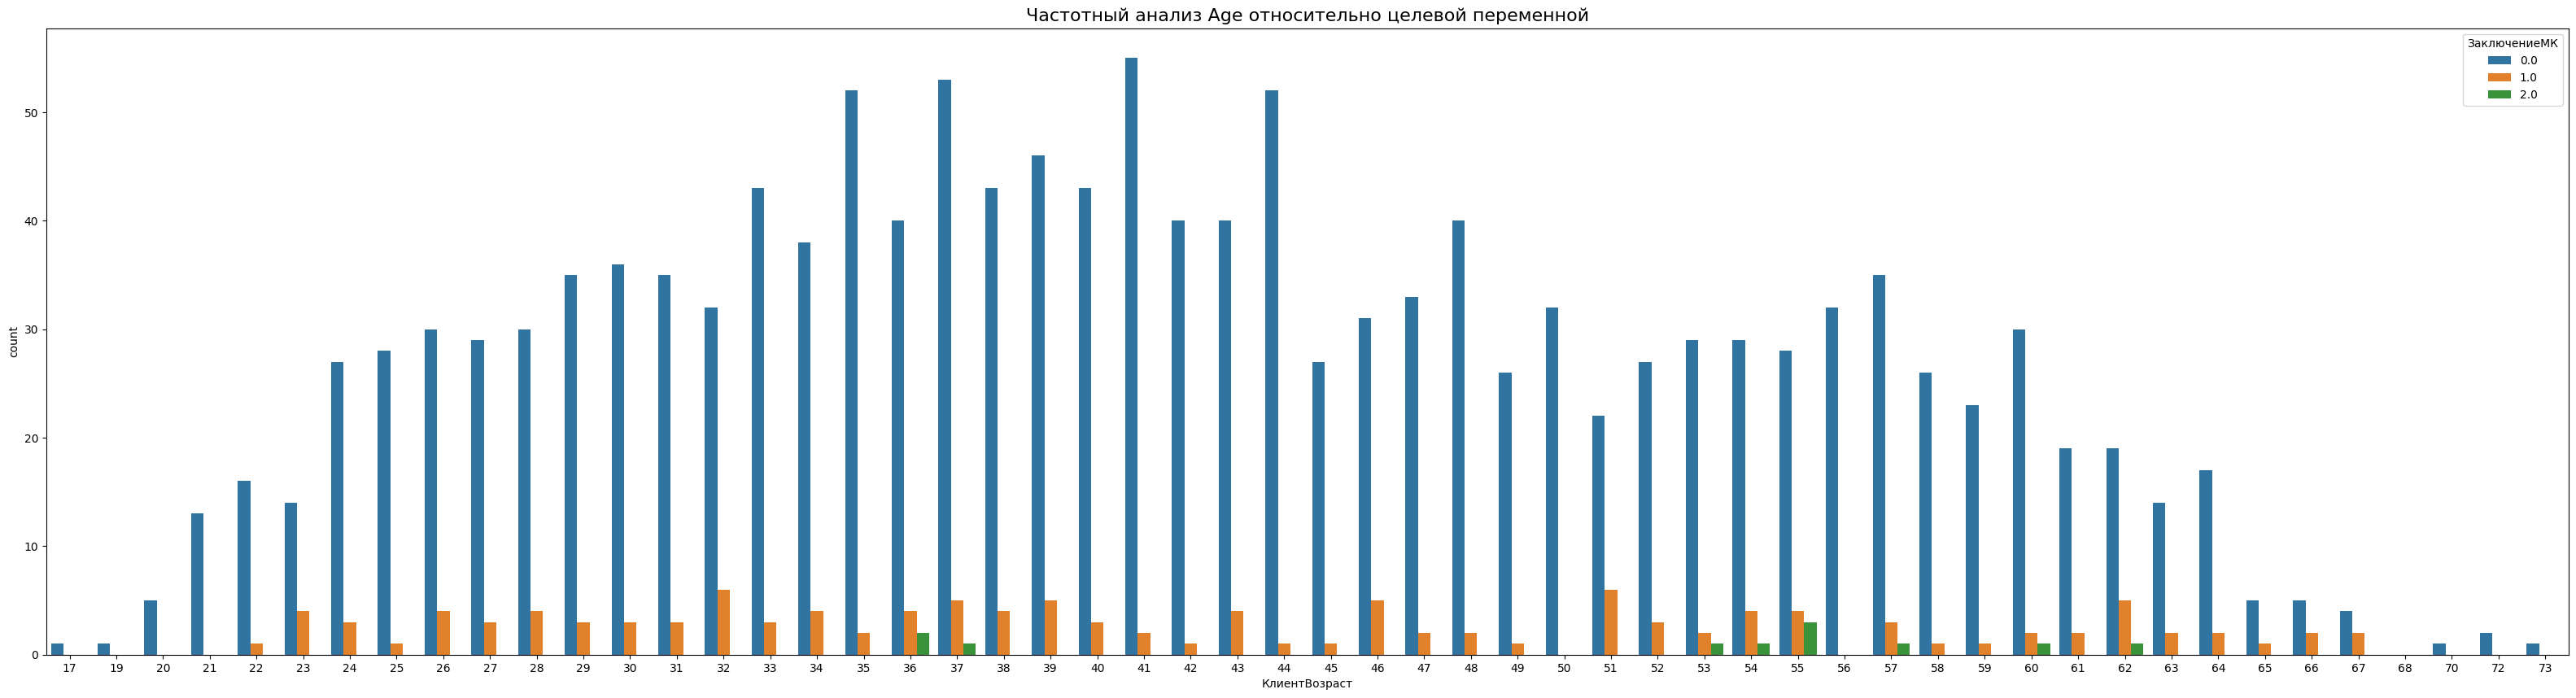

In [ ]:
# Задаем размер полотна
plt.figure(figsize=(40,10))

# Добавляем название графика
plt.title('Частотный анализ Age относительно целевой переменной', fontsize=16)

# Строим график countplot
sns.countplot(x= FIELD_CLIENT_AGE, hue= FIELD_CONCLUSION, data=df_new)

In [36]:
# список колонок с международной классификацией болезней. Скорее всего их колличество равно всем специализациям на профосмотре
mkb_columns = df.filter(regex="(?i)МКБ10").columns
print(mkb_columns)

Index(['ПсихиатрияНаркология1_МКБ101', 'Офтальмология1_МКБ101',
       'Оториноларингология1_МКБ101', 'ХирургНеИсп1_МКБ101',
       'Гинекология1_МКБ101', 'Стоматология1_МКБ101',
       'Дерматовенерология1_МКБ101', 'Рентгенология1_МКБ101',
       'Неврология1_МКБ101', 'Терапия1_МКБ101', 'Хирургия1_МКБ101',
       'Офтальмология1_МКБ102', 'Терапия2_МКБ101', 'Неврология2_МКБ101',
       'ЛабораторныеИсследования1_МКБ101', 'ЭКГНеИсп1_МКБ101',
       'УЗИДиагностика1_МКБ101', 'УЗИДиагностика2_МКБ101',
       'ПсихиатрияНаркология2_МКБ101', 'Терапия1_МКБ102',
       'ЛабораторныеИсследования2_МКБ101', 'Терапия1_МКБ103',
       'Психиатрия1_МКБ101', 'Гинекология1_МКБ102', 'Рентгенология2_МКБ101',
       'Гинекология2_МКБ101', 'Хирургия2_МКБ101',
       'ПроцедурнаяМедсестра1_МКБ101', 'ФункциональнаяДиагностика1_МКБ101',
       'УЗИДиагностика1_МКБ102', 'Стоматология2_МКБ101', 'Неврология1_МКБ102',
       'Оториноларингология2_МКБ101', 'Дерматовенерология1_МКБ102',
       'Дерматовенерология

In [37]:
import hashlib
def calculate_md5(value):
    # Преобразуем строку UUID в байтовый формат
    value_bytes = value.encode('utf-8')
    # Создаем объект хеш-функции MD5
    md5 = hashlib.md5()
    # Обновляем хеш-функцию байтами UUID
    md5.update(value_bytes)
    # Получаем хеш-код MD5 в шестнадцатеричном формате
    md5_hash = md5.hexdigest()
    integer_hash = int(md5_hash, 16)
    return integer_hash

In [ ]:
# Функция для преобразования UUID в int
def uuid_to_int(x):
    try:
        return int(uuid.UUID(x))
    except (ValueError, AttributeError):
        return 1




In [ ]:
def resolve_columns_where_uuid_and_simple_text(df):
  columns = []
  # Паттерн для проверки UUID-идентификаторов
  uuid_pattern = r'^[a-f\d]{8}(-[a-f\d]{4}){3}-[a-f\d]{12}$'

  # Перебор всех колонок в DataFrame
  for column_name in df.columns:
      # Проверка наличия текстовых значений в колонке
      has_text = df[column_name].dropna().apply(lambda x: bool(re.match(uuid_pattern, str(x))))
      
      # Вывод информации о колонке, если есть текстовые значения помимо UUID-идентификаторов
      if has_text.any():
        if has_text.all():
          continue
        columns.append(column_name)
        #print(f"Колонка '{column_name}' содержит текстовые значения помимо UUID-идентификаторов.")
  return columns

In [ ]:
mixed_columns_with_UUID = resolve_columns_where_uuid_and_simple_text(df)
print("колонки в которых перемежаются типы данных uuid и просто текст", ":",len(mixed_columns_with_UUID) )
print(mixed_columns_with_UUID)


колонки в которых перемежаются типы данных uuid и просто текст : 27
['ПсихиатрияНаркология1_БезСледовВВИнъекций_Значение', 'ПсихиатрияНаркология1_Внимание_Значение', 'ПсихиатрияНаркология1_МышлениеВ_Значение', 'ПсихиатрияНаркология1_Эмоционально_Значение', 'ПсихиатрияНаркология1_Интеллект_Значение', 'Офтальмология1_OD_Значение', 'Офтальмология1_OS_Значение', 'Гинекология1_МолочныеЖелезы_Значение', 'Стоматология1_Прикус_Значение', 'Терапия1_СВысыпаниями_Значение', 'УЗИДиагностика1_Размеры_Значение', 'УЗИДиагностика1_Контуры_Значение', 'УЗИДиагностика1_СосудистыйРисунок_Значение', 'УЗИДиагностика1_Форма_Значение', 'УЗИДиагностика1_Эхогенность_Значение', 'УЗИДиагностика1_Структура_Значение', 'УЗИДиагностика1_ВирсунговПроток_Значение', 'УЗИДиагностика1_Содержимое_Значение', 'Терапия2_СВысыпаниями_Значение', 'УЗИДиагностика2_Контуры_Значение', 'УЗИДиагностика2_СосудистыйРисунок_Значение', 'УЗИДиагностика2_Форма_Значение', 'УЗИДиагностика2_Эхогенность_Значение', 'УЗИДиагностика2_Структура_Зн

In [ ]:
# Проход по столбцам в цикле
with open('columns_sumary.txt', 'w') as fd:
  for i, (column_name, column_data) in enumerate(df.iteritems()):
      print(i, " ", column_name, ":", file=fd)
      print(df[column_name].value_counts().head().to_string(), file=fd)
      print("--------------", file=fd)

In [38]:
(df.columns + " | " +  df.loc[3].astype("str")).to_list()

['ДокументПрохождениеМедосмотра | b8a33910-8eec-11ec-80fe-0cc47aab8067',
 'Клиент | 98f9d761-8d65-11ec-80fe-0cc47aab8067',
 'КлиентДатаРождения | 1988-04-25 00:00:00',
 'КлиентПол | Мужской',
 'КлиентПолПредставление | Мужской',
 'ДатаЗавершенияМедосмотра | 2022-02-16 00:00:00',
 'ТипМедосмотра | Периодический',
 'ТипМедосмотраПредставление | Периодический',
 'ПсихОсвидетельствование | False',
 'Контрагент | a6d559b0-7835-11eb-80e8-0cc47aab8067',
 'Цех | Отдел техники и технологии строительства скважин',
 'Профессия | Главный специалист',
 'ЗаключениеМК | Годен',
 'ЗаключениеМКПредставление | Годен к работе в указанных условиях',
 'Заключение | Годен к работе в указанных условиях',
 'ДиспансернаяГруппа | I',
 'ДиспансернаяГруппаПредставление | I',
 'ВредныеФакторы | 11.1',
 'ЛабораторныеИсследования1_ДокументПрием | a1fb1fc6-8efb-11ec-80fe-0cc47aab8067',
 'ЛабораторныеИсследования1_ДатаПриема | 2022-02-16 12:40:02',
 'ЛабораторныеИсследования1_Салон | 1b071e3e-c87a-11e7-80de-708bcd7f83

In [39]:
# Определяем колонки с типом данных str (строки) и содержащие значения в формате UUID
uuid_columns = df.select_dtypes(include='object').apply(lambda x: x.astype(str).str.contains(r'[a-f\d]{8}-[a-f\d]{4}-[a-f\d]{4}-[a-f\d]{4}-[a-f\d]{12}', regex=True)).any()

# Выводим названия колонок, содержащих UUID
uuid_columns = uuid_columns[uuid_columns == True].index
print("Колонки с UUID:")
print(uuid_columns.shape)

Колонки с UUID:
(947,)


In [79]:
additional_columns = df.filter(regex="(?i)Дополнение_Значение$")


In [80]:
additional_columns.insert(0,"ADDITIONALS", 
                          additional_columns.apply(
                              lambda row : row.tolist(), 
                              axis = 1))


In [81]:
additional_columns

,ADDITIONALS,Эндоскопия1_ЖалобыДополнение_Значение,Терапия1_АнамнезДополнение_Значение,Офтальмология1_АнамнезДополнение_Значение,Офтальмология1_ODДополнение_Значение,Офтальмология1_OSДополнение_Значение,Терапия1_ЖалобыДополнение_Значение,Гинекология1_АнамнезДополнение_Значение,Гинекология1_ДиагнозДополнение_Значение,Гинекология1_ГоденНегоденДополнение_Значение,...,Офтальмология2_РефракцияДополнение_Значение,Неврология2_ГоденНегоденДополнение_Значение,Офтальмология1_ГоденНегоденДополнение_Значение,Оториноларингология1_СлизистаяПолостиНосаДополнение_Значение,Терапия3_ЖалобыДополнение_Значение,Терапия4_ЖалобыДополнение_Значение,Хирургия2_ДиагнозДополнение_Значение,Хирургия1_ДиагнозДополнение_Значение,Оториноларингология1_ЖалобыДополнение_Значение,Офтальмология1_ДвигательныйАппаратГлазДополнение_Значение
0,"[Дискинезия желчевыводящих путей , ХЭ, nan, na...",Дискинезия желчевыводящих путей,ХЭ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[nan, В анамнезе ГБ, nan, nan, nan, nan, nan, ...",NaN,В анамнезе ГБ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[nan, карбомезипин,мексидол, носит очки -2.50/...",NaN,"карбомезипин,мексидол",носит очки -2.50/-2.25,"1,0","1,0",нет,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Патологии со стороны слизистой пищевода, желу...","Патологии со стороны слизистой пищевода, желуд...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Без патологии., nan, носит очки -6.5 с астигм...",Без патологии.,NaN,"носит очки -6.5 с астигматизмом, лазерная коаг...","0,9","0,9",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,"[nan, Гипертоническая болезнь, принимает Амлод...",NaN,"Гипертоническая болезнь, принимает Амлодипин",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
additional_columns['Combined_Column'] = additional_columns.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)


<ipython-input-49-fd505587bfff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  additional_columns['Combined_Column'] = additional_columns.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)


In [43]:
additionals_columns.apply(lambda row: " ".join([f" {row[col]}" for col in additionals_columns.columns if pd.notna(row[col])]), axis=1)


0                    Дискинезия желчевыводящих путей   ХЭ
1                                           В анамнезе ГБ
2        карбомезипин,мексидол  носит очки -2.50/-2.25...
3        Патологии со стороны слизистой пищевода, желу...
4        Без патологии.  носит очки -6.5 с астигматизм...
                              ...                        
1977                                                     
1978                                                     
1979     Тесты на обобщение и исключение выполняет. В ...
1980     Гипертоническая болезнь, принимает Амлодипин ...
1981                                                     
Length: 1978, dtype: object